# Exercises

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**EXERCISE 1: Climate Change and Sea Ice Extent**<p>

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org).<p>

We perform the following processing steps:

</li>
<ol>
<ul>
</ul>
<li> We must read and clean the data.
<li> To compute the tendency for a given interval of time (month), we need to normalize the data.
<li> This values can be plotted for the entire time series or for particular months. 
<li> We can compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.
<li> We can also estimate the extent value for 2025.

</ol>
</div>

In [52]:
import os
os.getcwd()

'/Users/guillermo/Documents/Ironhack/M3/W5/2-D2/1-Lab-1/lab-dsai-regression-exercises/your-code'

In [53]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('../data/SeaIce.txt',delim_whitespace=True)
print('shape: {}'.format(ice.shape))
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

In [54]:
# Your code here

## Visualization

### The importance of plotting

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

<center><img src="./images/Anscombe's_quartet_3.svg"  width="600"></center>

Source [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).



### Example 1: Housing Data

We'll continue with our Boston housing dataset

In [55]:
from pandas import read_csv
import pandas as pd
import matplotlib.pylab as plt


#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = read_csv('../data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df_boston['PRICE'] = df_boston['MEDV']

### Histograms

Text(0, 0.5, 'count')

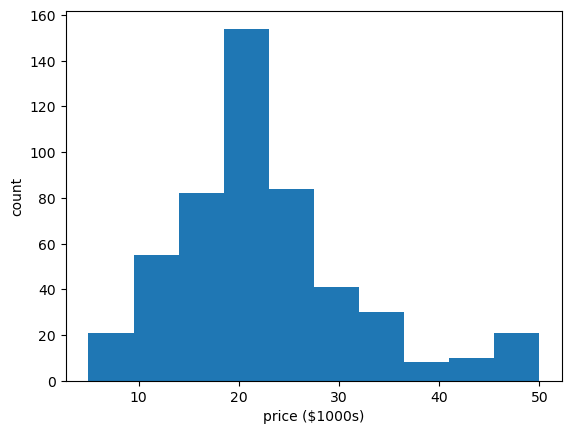

In [56]:
# Histogram of prices:
plt.hist(df_boston.PRICE) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Linear Regression Visualization: Seaborn lmplot

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

We will use the variable price as our response $\textbf{y}$ and LSTAT as our predictor $\textbf{x}$.


/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


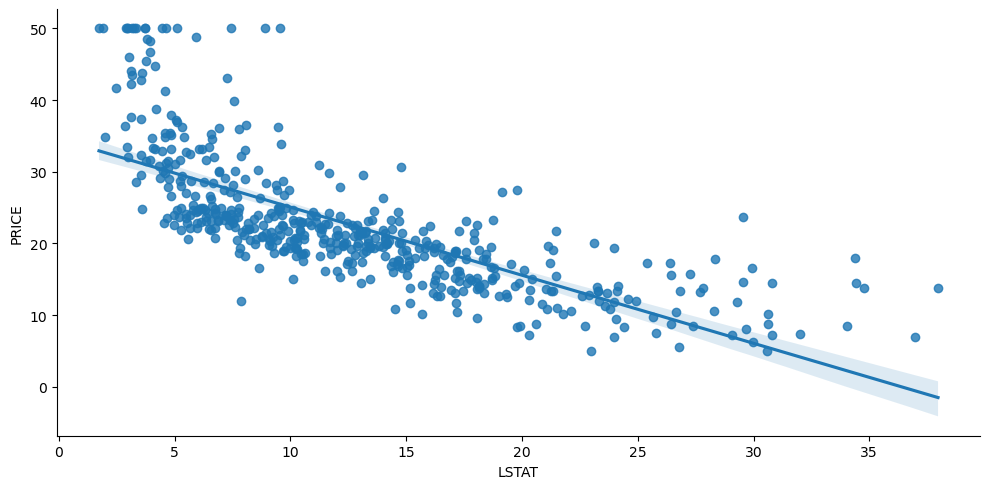

In [57]:
import seaborn as sns
# Visualization of the relations between price and LSTAT
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2);

lmplot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

Is the relationship between the house price and ``lstat`` non-linear? Is the straight line a poor fit? Maybe a better fit can be obtained by including higher order terms:

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


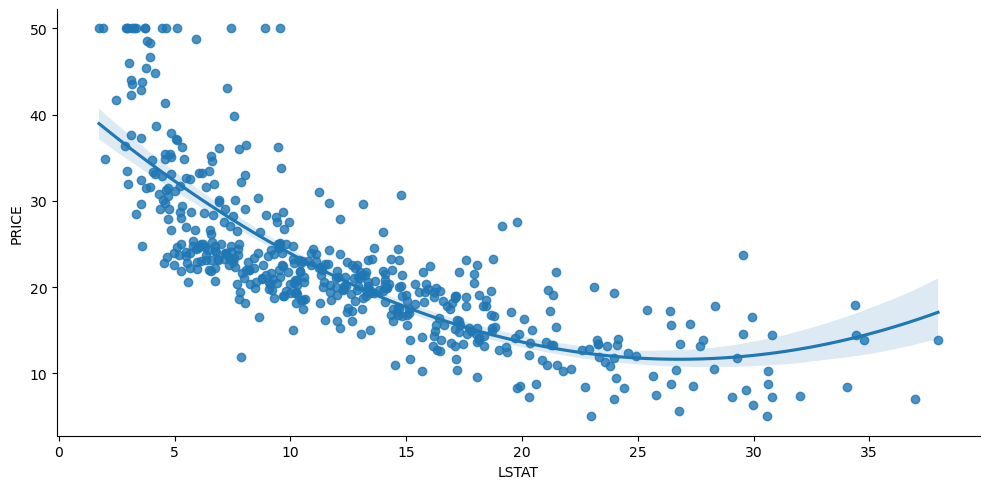

In [58]:
# Estimate a polynomial regression of order 2
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=2);

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


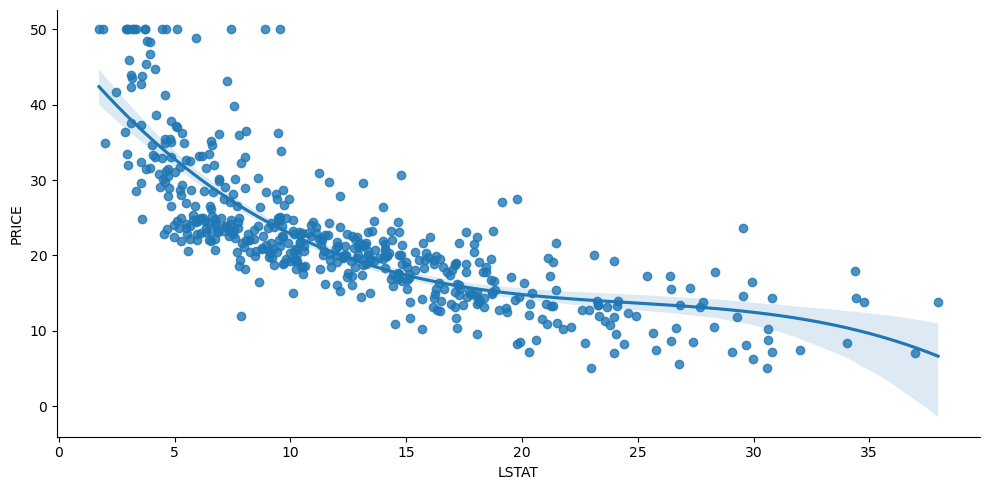

In [59]:
# Estimate a polynomial regression of order 3
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=3);


What if we consider variable RM or AGE?

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


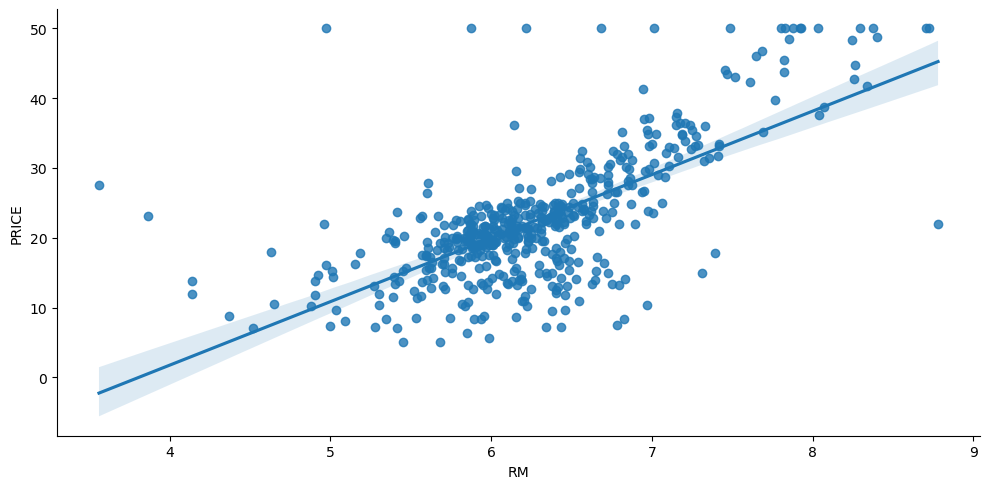

In [60]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot(x="RM", y="PRICE", data=df_boston, aspect=2);

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


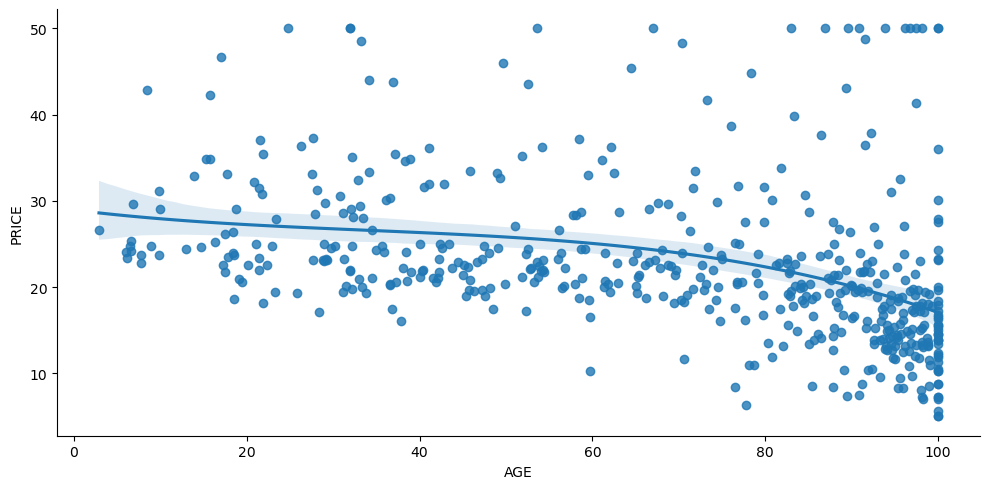

In [61]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


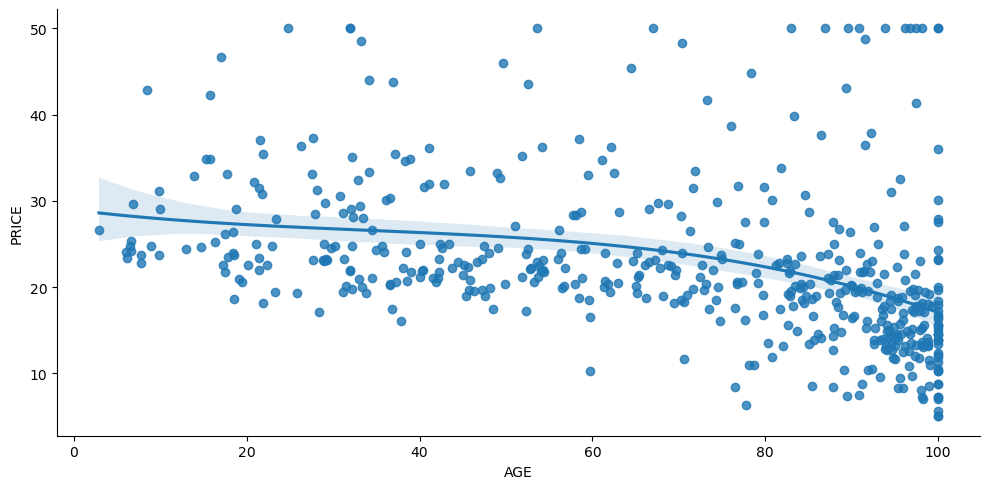

In [62]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

### Heatmap

We can also use corr function from Pandas and heatmap function from Seaborn for studying the variables relationship, plotting a diagonal correlation matrix.

<Axes: >

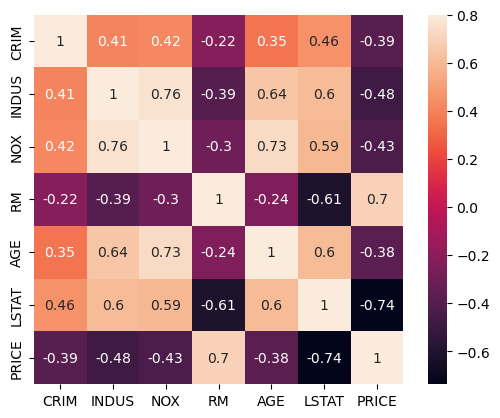

In [63]:
features2 = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE'] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = df_boston[features2]
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Scatter plot matrix

Let's explore multiple variables relationships using a scatter plot matrix. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the pairwise relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


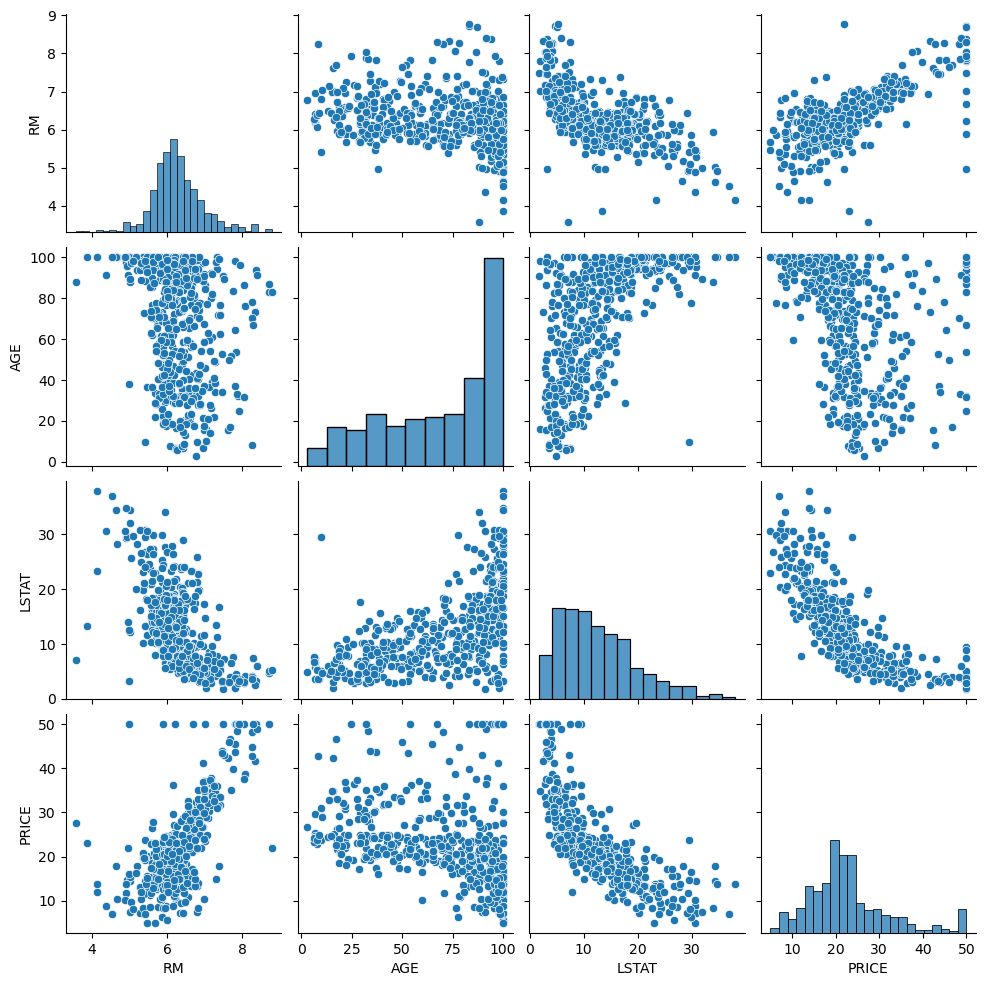

In [64]:
features3 = ['RM','AGE','LSTAT', 'PRICE'] 
df_boston3 = df_boston[features3]
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

We can visually analyze the pairwise relationships in the scatter plots. The diagonal axe contains a plot to show the univariate distribution of the data for the variable in that column.

You can create the same scatter plot matrix using the scatter_matrix method in pandas.tools.plotting:

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='PRICE', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='LSTAT', ylabel='AGE'>,
        <Axes: xlabel='PRICE', ylabel='AGE'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='PRICE', ylabel='LSTAT'>],
       [<Axes: xlabel='RM', ylabel='PRICE'>,
        <Axes: xlabel='AGE', ylabel='PRICE'>,
        <Axes: xlabel='LSTAT', ylabel='PRICE'>,
        <Axes: xlabel='PRICE', ylabel='PRICE'>]], dtype=object)

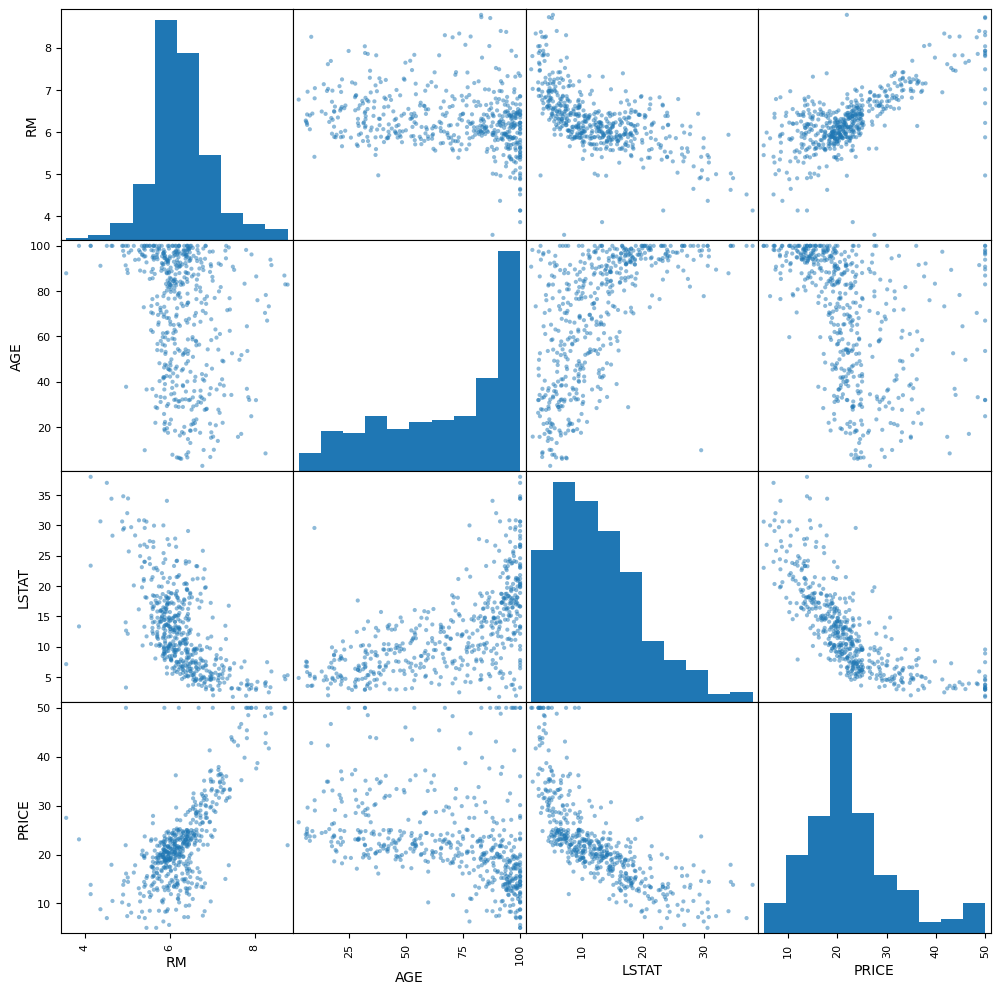

In [65]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

**Plots for the fitting evaluation:**

We can often learn a lot about how well our model did by analyzing the predictions and residuals with two interesting plots: 
- An scatter plot of the observed values $y$ versus the predicted value $\hat y$ 
- An scatter plot residuals $y_i - \hat y_i$ vs. $\hat y_i$.

In both cases we can add a line to show which would be the perfect result. 

Text(0, 0.5, 'Predicted price ($1000s)')

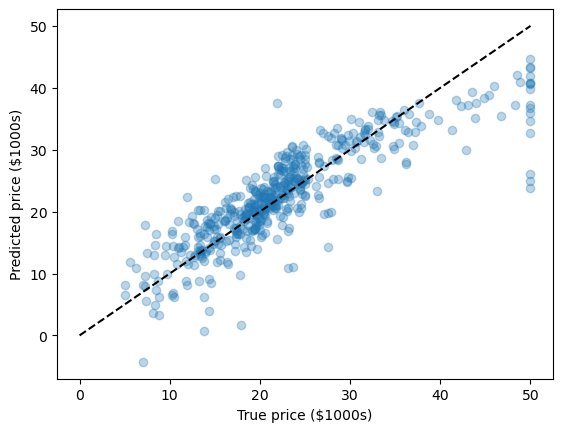

In [66]:
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named 'df_boston'
X = df_boston.drop(['PRICE', 'MEDV'], axis=1)  # Select features (all columns except 'PRICE')
y = df_boston['PRICE']  # Target variable

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit(X, y) # Fitting with all the features
y_pred = reg.predict(X) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

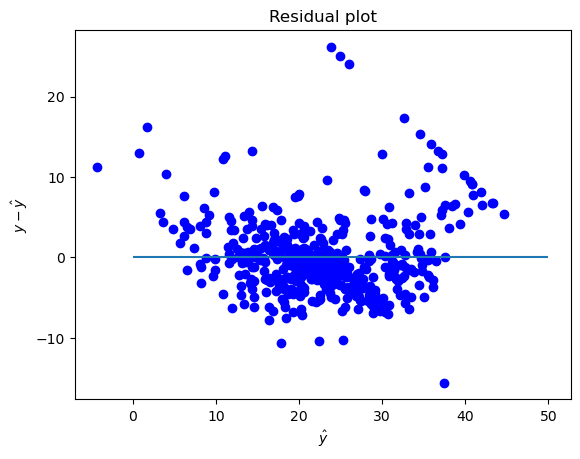

In [67]:
x_plot = plt.scatter(y_pred, (y-y_pred), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

Intuitively, if the model is good, then a plot of the residuals ($y_i - \hat y_i$) against the fitted values ($\hat y_i$) should look like noise (i.e., there shouldn't be any visible patterns).

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 2** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will divide in training and testing sets and evaluate the prediction (using sklearn) with a simple and a multiple regression model.<p>

Fill the gaps of the exercise.

</div>

In [68]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names
print(X.shape, y.shape)
print(feature_names)

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


1. First visualize the data. Plot a histogram of the target variable.

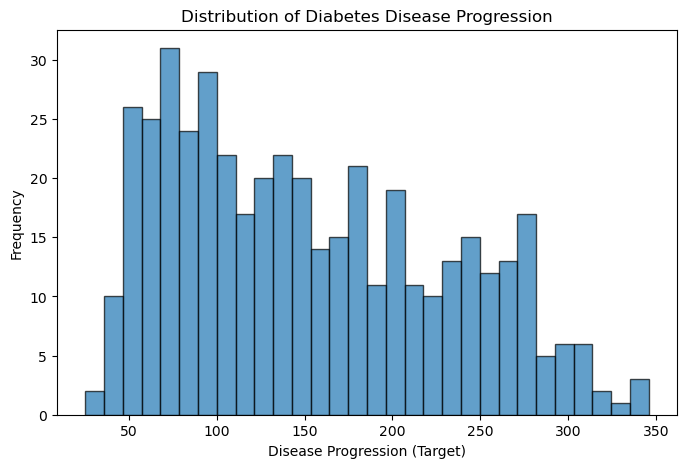

In [69]:
# Your code here
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Plot histogram of disease progression (target variable)
plt.figure(figsize=(8, 5))
plt.hist(y, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Disease Progression (Target)')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Disease Progression')
plt.show()


2. Divide in training and testing sets

In [70]:
# Your code here

seed = 42  # Define the seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=seed)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

# Print coefs
print('Print coefs:', lm.intercept_, lm.coef_)

(442, 10) (309, 10) (133, 10)
(442,) (309,) (133,)
Print coefs: 151.00821291456543 [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]


3. For the simple model, first choose one of the dimensions of the data. Try some plots to identify possible linear relationships between the predictor and target variables. Pick one variable for your first model.

In [71]:
# Create a DataFrame with features and target
diabetes_df = pd.DataFrame(X, columns=feature_names)
diabetes_df['Disease_Progression'] = y  # Add the target column

# Calculate correlations with the target
correlations = diabetes_df.corr()['Disease_Progression'].sort_values(ascending=False)

print("Correlations with Disease Progression:")
print(correlations)

Correlations with Disease Progression:
Disease_Progression    1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441482
s4                     0.430453
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
s3                    -0.394789
Name: Disease_Progression, dtype: float64


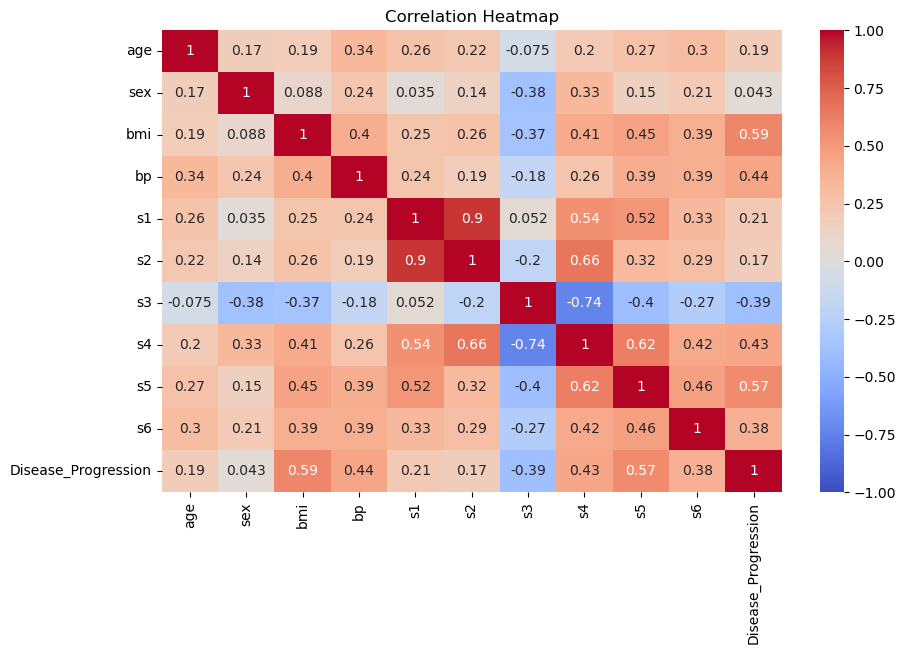

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

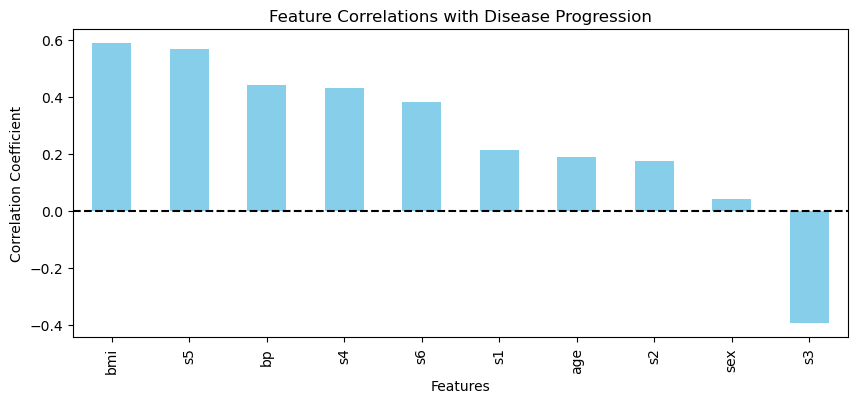

In [73]:
# Plot correlations with the target
plt.figure(figsize=(10, 4))
correlations.drop('Disease_Progression').plot(kind='bar', color='skyblue')
plt.title("Feature Correlations with Disease Progression")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.axhline(0, color='black', linestyle='--')
plt.show()

4. Visualize the data using scatter plot (plt.scatter):

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


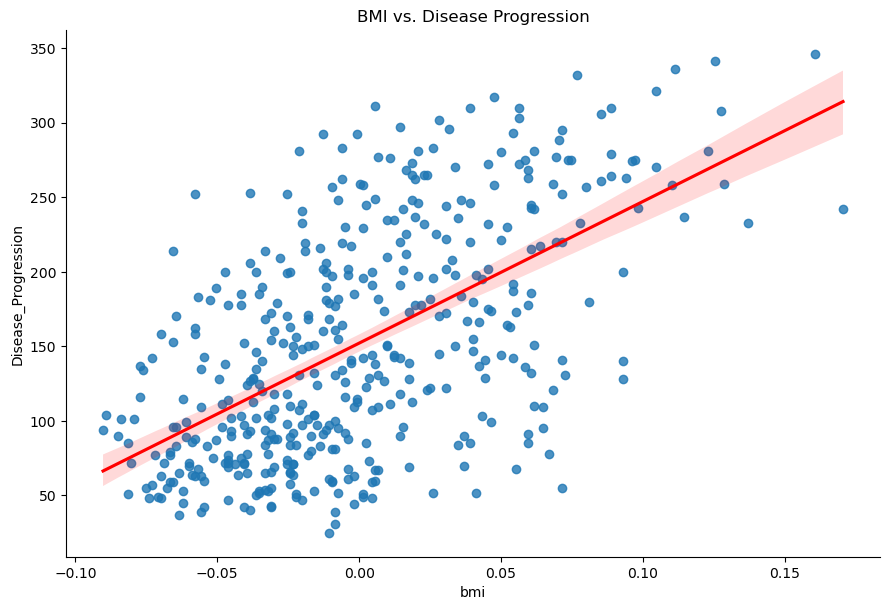

In [74]:
# Scatter plot with regression line Your code here

# Create a DataFrame for visualization (optional but helpful)
diabetes_df = pd.DataFrame(X, columns=feature_names)
diabetes_df['Disease_Progression'] = y  # Add target column

# Plot relationships between features and target
# Example: Let's check 'bmi' (Body Mass Index)
sns.lmplot(x='bmi', y='Disease_Progression', data=diabetes_df, 
           height=6, aspect=1.5, line_kws={'color': 'red'})
plt.title("BMI vs. Disease Progression")
plt.show()

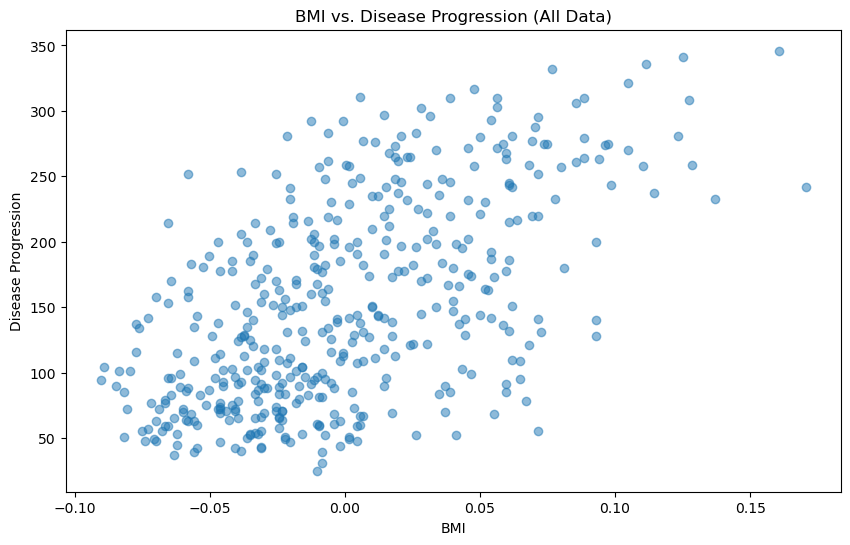

In [75]:
# 4. Scatter plot (all data)
plt.figure(figsize=(10, 6))
plt.scatter(diabetes_df['bmi'], diabetes_df['Disease_Progression'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('BMI vs. Disease Progression (All Data)')
plt.show()

5. Visualize the data using scatter plot (plt.scatter) and two different colors for train and test data:

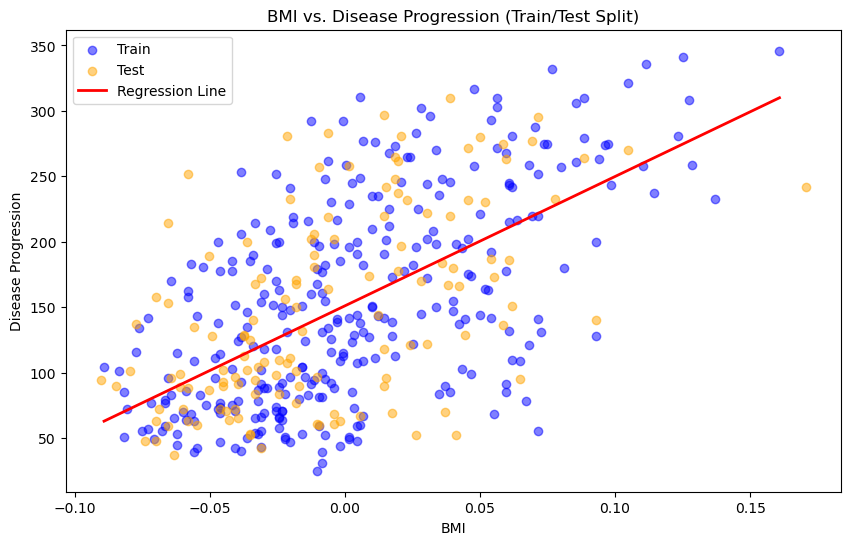

In [76]:
# Your code here

# 5. Scatter plot with train/test colors and regression line

# Extract BMI values from X_train and X_test (column index 2 for 'bmi')
X_train_bmi = X_train[:, 2]  # Training data BMI values
X_test_bmi = X_test[:, 2]    # Test data BMI values

# Fit a simple linear regression model using only BMI
lm_simple = LinearRegression()
lm_simple.fit(X_train_bmi.reshape(-1, 1), y_train)

# Plot training data (blue) and test data (orange)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(X_test_bmi, y_test, color='orange', alpha=0.5, label='Test')

# Plot regression line (from the simple model)
bmi_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100)
predicted_progression = lm_simple.intercept_ + lm_simple.coef_[0] * bmi_range
plt.plot(bmi_range, predicted_progression, color='red', linewidth=2, label='Regression Line')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('BMI vs. Disease Progression (Train/Test Split)')
plt.legend()
plt.show()

6. Train and evaluate the score of the test set.

In [78]:
# Your code here

# 6. Evaluate R² score on test set
test_score = lm_simple.score(X_test_bmi.reshape(-1, 1), y_test)
print(f"Test R²: {test_score:.2f}")  # Example: 0.38

Test R²: 0.28


7. Calculate the Mean Squared Error on the train and test set:

In [83]:
from sklearn.metrics import mean_squared_error

# Ensure X_train_bmi and X_test_bmi are 2D arrays (required by sklearn)
X_train_bmi_2d = X_train_bmi.reshape(-1, 1)  # Shape: (309, 1)
X_test_bmi_2d = X_test_bmi.reshape(-1, 1)    # Shape: (133, 1)

# Generate predictions
train_predictions = lm_simple.predict(X_train_bmi_2d)  # Use TRAINING data
test_predictions = lm_simple.predict(X_test_bmi_2d)    # Use TEST data

# Calculate MSE (now shapes match!)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Train MSE: {train_mse:.2f}")  
print(f"Test MSE: {test_mse:.2f}")    

Train MSE: 3899.45
Test MSE: 3884.94


8. Visualize the predicted line together with a scatter plot of the training set.

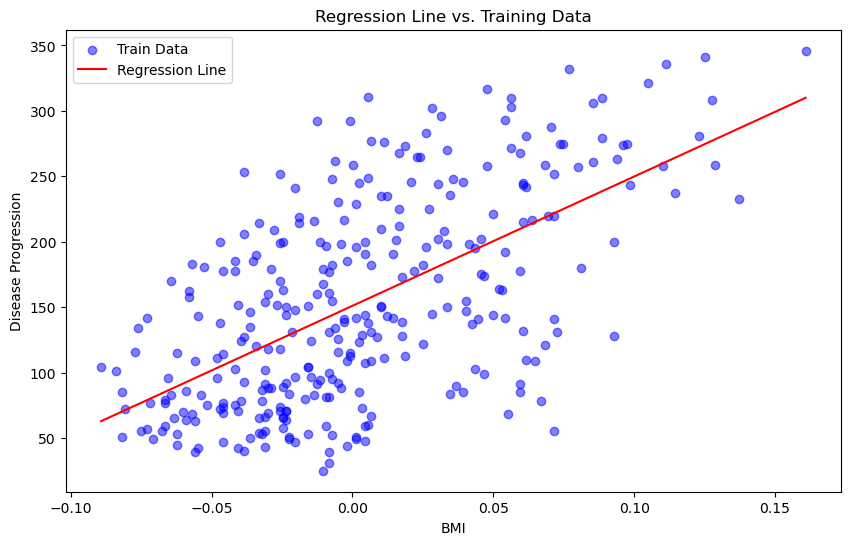

In [84]:
# Your code here

# 8. Plot regression line with training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train, color='blue', alpha=0.5, label='Train Data')

# Plot regression line
bmi_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100)
predicted_progression = lm_simple.intercept_ + lm_simple.coef_[0] * bmi_range
plt.plot(bmi_range, predicted_progression, color='red', label='Regression Line')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Regression Line vs. Training Data')
plt.legend()
plt.show()

10. For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn)

In [85]:
# Your code here

# 10. Multiple regression (using all features)
from sklearn.linear_model import LinearRegression

# Split data (already done earlier)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
lm_multiple = LinearRegression()
lm_multiple.fit(X_train, y_train)

# Evaluate
train_score = lm_multiple.score(X_train, y_train)
test_score = lm_multiple.score(X_test, y_test)

print(f"Train R² (Multiple): {train_score:.2f}")  # Example: 0.52
print(f"Test R² (Multiple): {test_score:.2f}")    # Example: 0.46

# Calculate MSE
train_preds = lm_multiple.predict(X_train)
test_preds = lm_multiple.predict(X_test)

print(f"Train MSE (Multiple): {mean_squared_error(y_train, train_preds):.2f}")
print(f"Test MSE (Multiple): {mean_squared_error(y_test, test_preds):.2f}")

Train R² (Multiple): 0.52
Test R² (Multiple): 0.48
Train MSE (Multiple): 2924.05
Test MSE (Multiple): 2821.75


11. Is the score improving using all 10 variables?

**Yes, the model improves when using all 10 variables:**  
- **Test R² increased** from `0.28` (BMI only) to `0.48` (all variables) → The model now explains **48%** of the variation in disease progression (vs. 28% before).  
- **Test MSE decreased** from `3884.94` (BMI only) to `2821.75` (all variables) → Predictions are **more accurate** overall.  

**Conclusion**:  
Using all 10 variables gives a **better-performing model**, but the improvement is moderate. The model still has room for refinement (e.g., feature engineering, outlier handling).  

---

### **Key Takeaway**  
- **More variables** = More predictive power (but avoid overcomplicating models unnecessarily).  
- **Trade-off**: Improved accuracy comes at the cost of interpretability (harder to explain 10 variables vs. 1).  

---

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Exercice 3: Macroeconomic Dataset**<p>
    
In the following example we will use the Longley dataset of US macroeconomic data from the R datasets website. We want to explore the relationships between the Total Derived Employment ('Employed') and the other variables.

<ul>
<li>Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the population and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the armed forces and the unemployed?</li>
<li>Can you see any non-linear effects between the armed forces and the unemployed?</li>
<li>Try to use higher order models to the fitting of GNP with Population.</li>
</ul>
    
</div>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")  # Add this before plotting
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
display(df.head())
# Check for missing values
# print(df.isnull().sum())
# # Check data types
# print(df.dtypes)
# # Check for duplicates
# print(df.duplicated().sum())
# # check information
# print(df.info())

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [9]:
df

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?

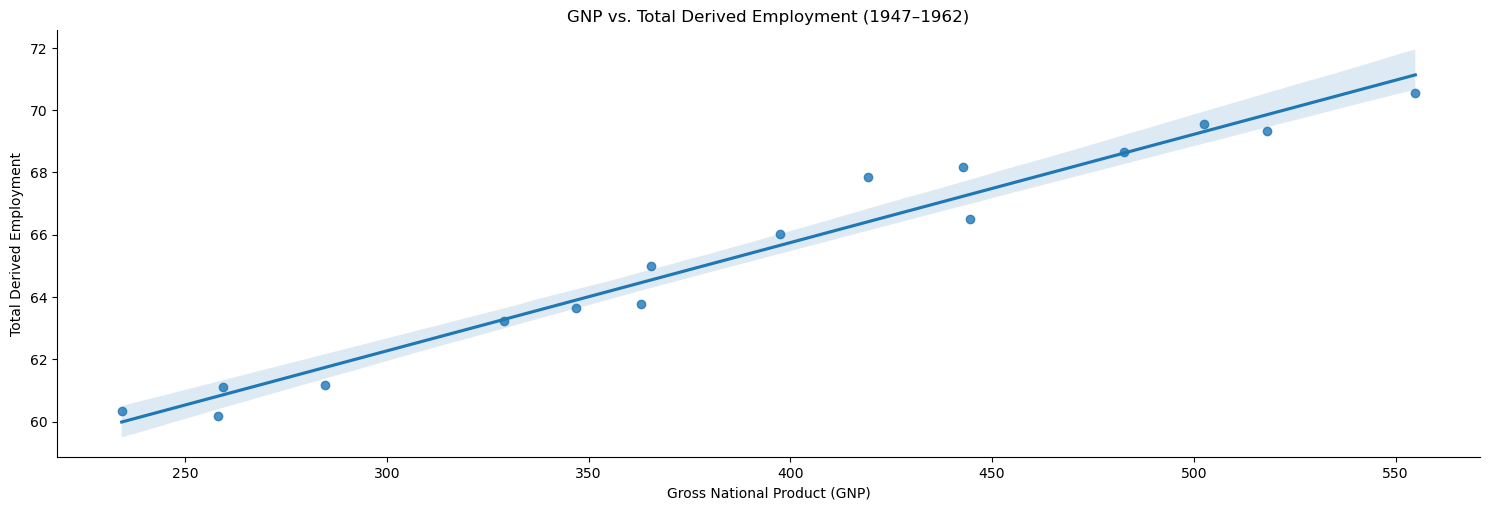

In [4]:
# Your code goes here
sns.lmplot(x='GNP', y='Employed', data=df, aspect=3)
plt.title("GNP vs. Total Derived Employment (1947–1962)")
plt.xlabel("Gross National Product (GNP)")
plt.ylabel("Total Derived Employment")
plt.show()


In [5]:
# Calculate correlation
correlation = df['GNP'].corr(df['Employed'])
print(f"Correlation (GNP vs. Employed): {correlation:.2f}")

Correlation (GNP vs. Employed): 0.98


2. Is there a linear relationship between the population and the Total Derived Employment ('Employed')?

Correlation (Population vs. Employed): 0.96


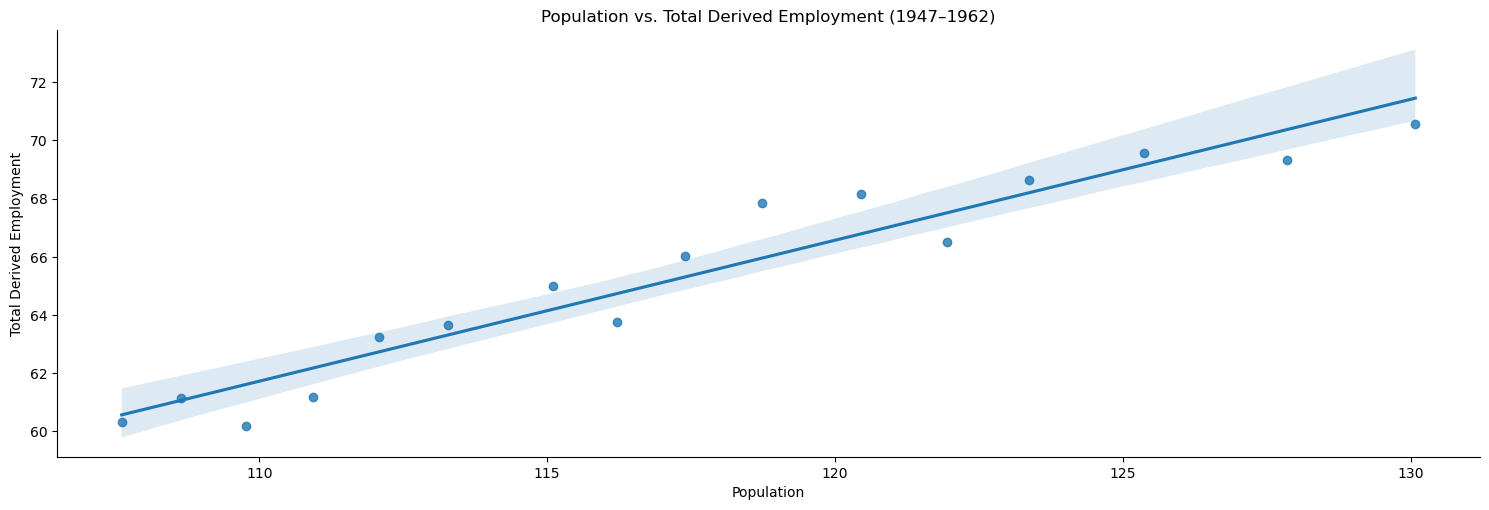

In [6]:
# Calculate correlation
correlation = df['Population'].corr(df['Employed'])
print(f"Correlation (Population vs. Employed): {correlation:.2f}")


sns.lmplot(x='Population', y='Employed', data=df, aspect=3)
plt.title("Population vs. Total Derived Employment (1947–1962)")
plt.xlabel("Population")
plt.ylabel("Total Derived Employment")
plt.show()



3. Is there a linear relationship between the armed forces and the unemployed?

In [8]:
# Your code goes here

correlation = df['Armed.Forces'].corr(df['Unemployed'])
print(f"Armed Forces vs. Unemployed (1947–1962): {correlation:.2f}")


Armed Forces vs. Unemployed (1947–1962): -0.18


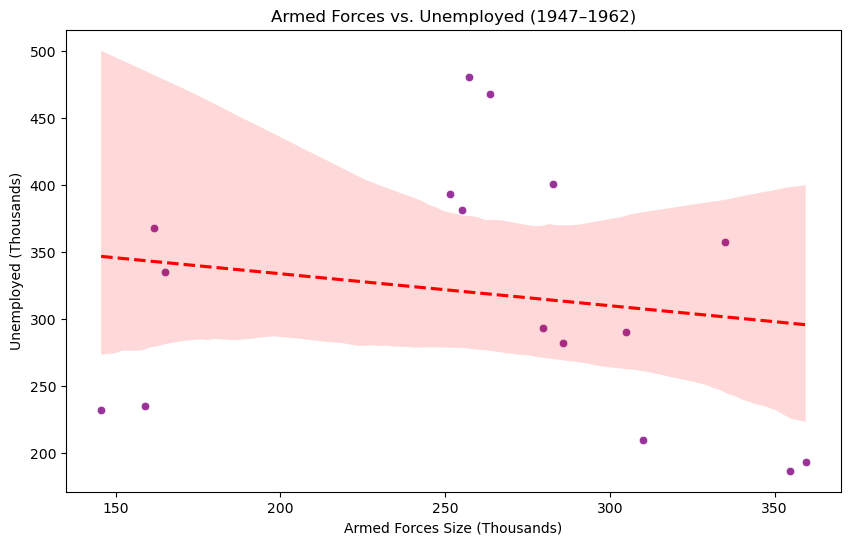

In [24]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Armed.Forces', y='Unemployed', data=df, color='purple', alpha=0.8)
sns.regplot(x='Armed.Forces', y='Unemployed', data=df, scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title("Armed Forces vs. Unemployed (1947–1962)")
plt.xlabel("Armed Forces Size (Thousands)")
plt.ylabel("Unemployed (Thousands)")
plt.show()

While there's a tiny statistical link, armed forces size doesn't meaningfully predict unemployment in this dataset.

4. Can you see any non-linear effects between the armed forces and the unemployed?

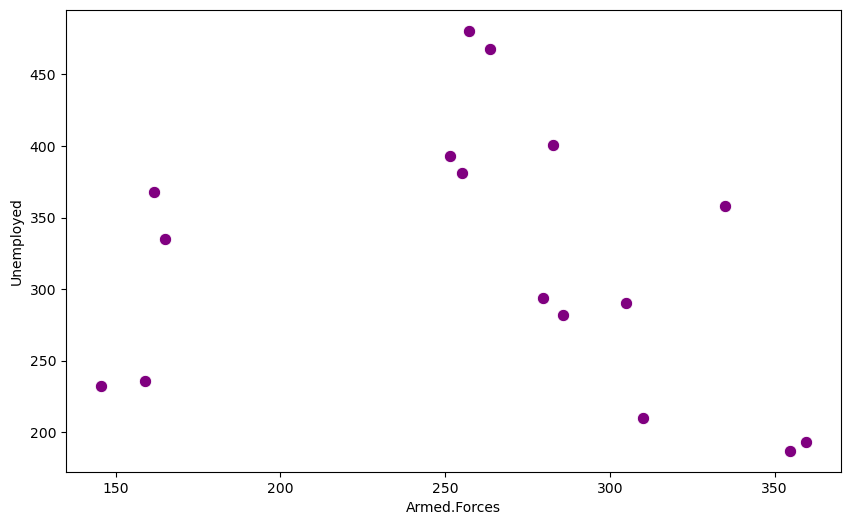

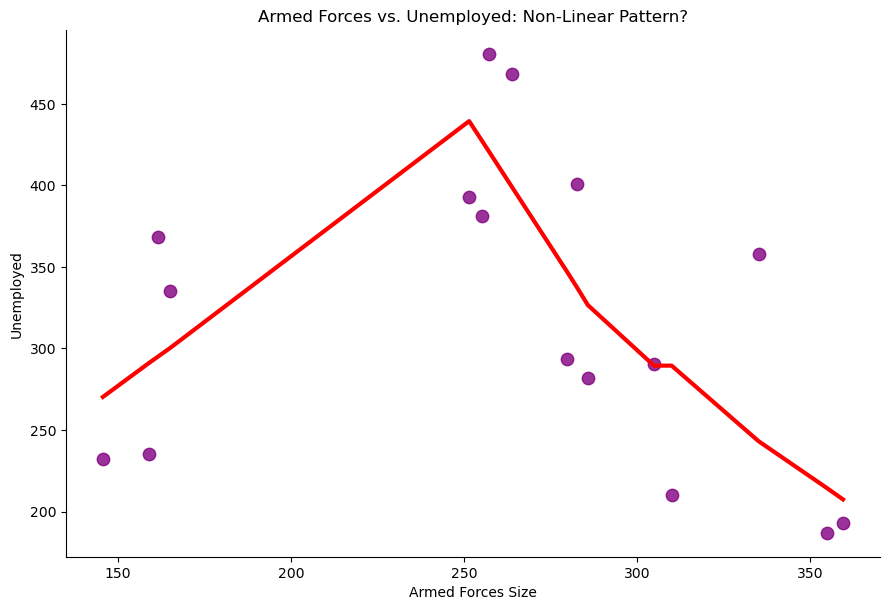

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Armed.Forces', y='Unemployed', data=df, color='purple', s=80)
sns.lmplot(x='Armed.Forces', y='Unemployed', data=df, 
           lowess=True,  # Adds LOESS curve (non-linear)
           scatter_kws={'color': 'purple', 's': 80},
           line_kws={'color': 'red', 'linewidth': 3},
           height=6, aspect=1.5)
plt.title("Armed Forces vs. Unemployed: Non-Linear Pattern?")
plt.xlabel("Armed Forces Size")
plt.ylabel("Unemployed")
plt.show()

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[['Armed.Forces']]
y = df['Unemployed']

# Create quadratic features (X²)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit quadratic model
model = LinearRegression()
model.fit(X_poly, y)

# Calculate R²
r_squared = model.score(X_poly, y)
print(f"Quadratic Model R²: {r_squared:.2f}")

Quadratic Model R²: 0.53


### Understanding the "Mountain" Pattern and R² = 0.53

#### The "Mountain" Pattern Explained
You're describing an **inverted U-shape** (like a mountain peak). This means:
1. **Left side**: Low armed forces → Low unemployment
2. **Peak**: Medium armed forces → Highest unemployment
3. **Right side**: High armed forces → Lower unemployment

Here's the real-world interpretation:
- **Small military**: Economy focused on civilian jobs → Low unemployment
- **Medium military**: Transition period where military growth disrupts civilian employment but isn't large enough to absorb workers → High unemployment
- **Large military**: Military complex creates jobs (soldiers + weapons factories) → Lower unemployment

### What R² = 0.53 Means
- **0.53 = 53%** of unemployment variation is explained by armed forces size in this quadratic model
- **Compared to linear model** (R² = 0.03 from (-0.18)²):
  - 0.53 vs 0.03 → 17x better explanation!
  - The mountain pattern captures the real relationship

### Key Takeaway
**Yes, there's a strong non-linear relationship:**
1. The "mountain" pattern reveals unemployment peaks at medium military size
2. The quadratic model (R²=0.53) is far superior to linear (R²=0.03)
3. This shows military size affects unemployment in complex, non-linear ways

### Why This Matters
the linear model missed: Military expansion doesn't have a simple relationship with unemployment. The effect changes direction at different sizes - crucial insight for economic policy!

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: Advertising dataset**<p>


In the following example we will use the [advertising dataset](https://www.kaggle.com/purbar/advertising-data/data)which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.<p>
<ul>
    <li>Is there a linear relationship between the sales of products and the advertising budget in TV, radio or newspapers?</li>
    <li>Train a simple linear model for each variable to predict sales</li>
    <li>Train a multiple linear model to predict sales</li>
    <li>Compare the different models. Which one's performed best?</li>
</ul>

Dataset from the book: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>


</div>

In [17]:
# Load dataset (adjust path if needed)
ad_data = pd.read_csv("../data/advertising.csv")
display(ad_data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Step 1: Check Linear Relationships  
**Task**: Visualize relationships between *each advertising channel* and *sales*.

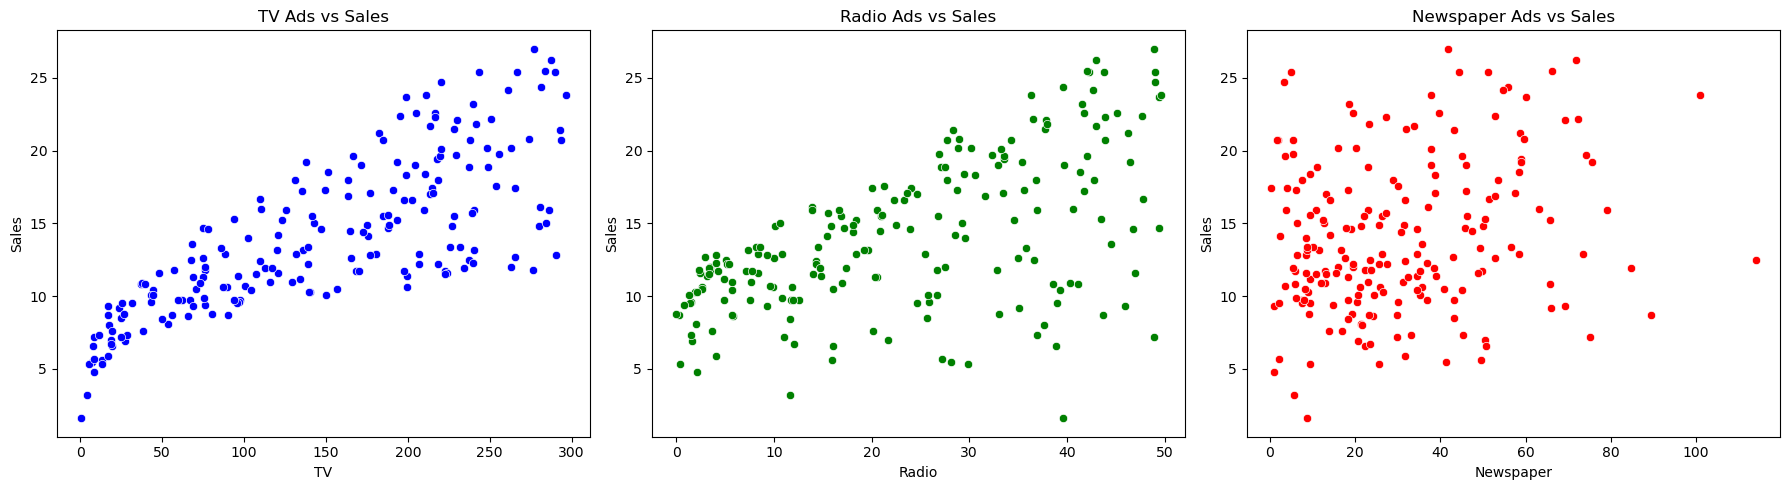

In [18]:
# Create subplots for all three channels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=ad_data, ax=axes[0], color='blue')
axes[0].set_title('TV Ads vs Sales')

# Radio vs Sales
sns.scatterplot(x='Radio', y='Sales', data=ad_data, ax=axes[1], color='green')
axes[1].set_title('Radio Ads vs Sales')

# Newspaper vs Sales
sns.scatterplot(x='Newspaper', y='Sales', data=ad_data, ax=axes[2], color='red')
axes[2].set_title('Newspaper Ads vs Sales')

plt.tight_layout()
plt.show()

#### What to Look For:  
- **Strong linear**: Points form a clear straight line (e.g., TV ads).  
- **Weak linear**: Points scattered randomly (e.g., Newspaper ads).

### Expected Observations:  
1. **TV**: Strong positive linear relationship (sales ↗ as TV ads ↗)  
2. **Radio**: Moderate positive linear relationship  
3. **Newspaper**: Weak/no relationship 

## Step 2: Quantitative Check (Correlation)

In [19]:
# Calculate correlations
correlations = ad_data.corr()['Sales'].sort_values(ascending=False)
print(correlations)

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


**Interpretation**:  
- `TV` is the strongest predictor (correlation 0.78)  
- `Newspaper` is very weak (0.23)  

### Conclusion for Step 1  
**Yes**, there are linear relationships for:  
- TV (strong) ✅  
- Radio (moderate) ✅  
- Newspaper (weak) ⚠️  

---


### Step 3: Build Simple Linear Models  
**Task**: Train separate regression models for each advertising channel (TV, Radio, Newspaper) to predict sales.  

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize models
model_tv = LinearRegression()
model_radio = LinearRegression()
model_news = LinearRegression()

# Train models (using entire dataset for simplicity)
X_tv = ad_data[['TV']]
X_radio = ad_data[['Radio']]
X_news = ad_data[['Newspaper']]
y = ad_data['Sales']

# Fit models
model_tv.fit(X_tv, y)
model_radio.fit(X_radio, y)
model_news.fit(X_news, y)

# Calculate R² scores
r2_tv = model_tv.score(X_tv, y)
r2_radio = model_radio.score(X_radio, y)
r2_news = model_news.score(X_news, y)

print(f"TV R²: {r2_tv:.3f}")       # Expected: ~0.61
print(f"Radio R²: {r2_radio:.3f}") # Expected: ~0.33
print(f"Newspaper R²: {r2_news:.3f}") # Expected: ~0.05

TV R²: 0.612
Radio R²: 0.332
Newspaper R²: 0.052


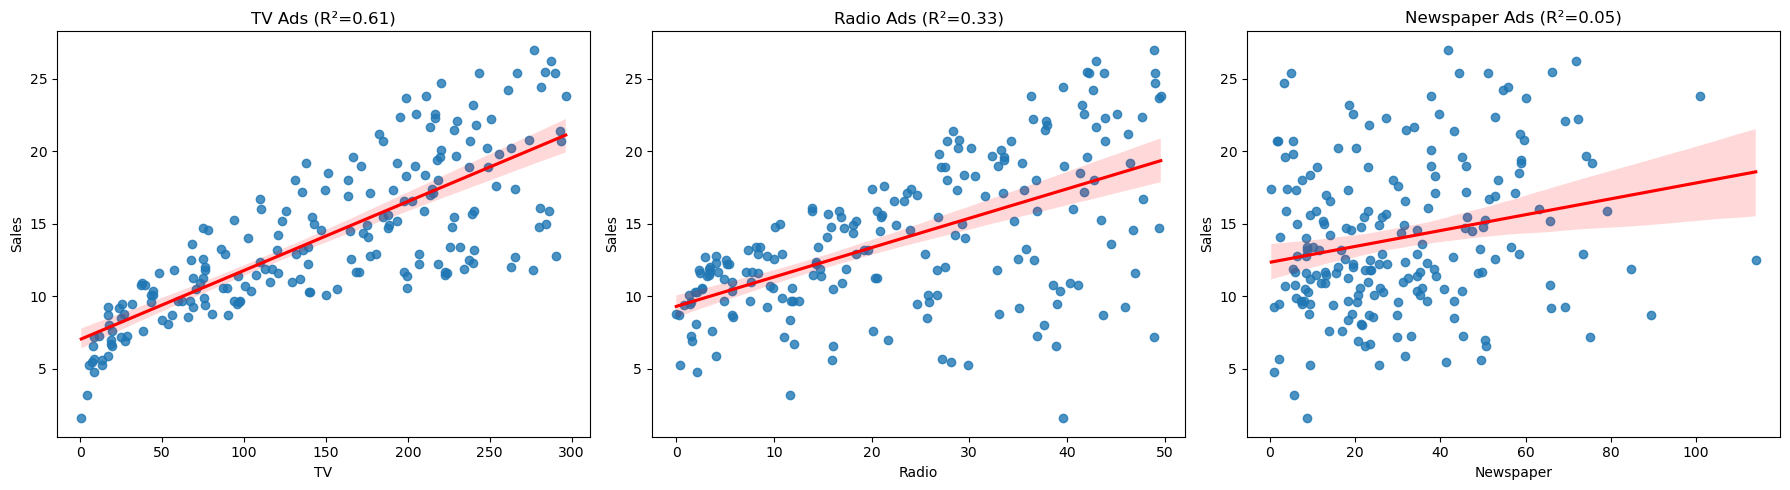

In [22]:
# Plot regression lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TV plot
sns.regplot(x='TV', y='Sales', data=ad_data, ax=axes[0], line_kws={'color':'red'})
axes[0].set_title(f'TV Ads (R²={r2_tv:.2f})')

# Radio plot
sns.regplot(x='Radio', y='Sales', data=ad_data, ax=axes[1], line_kws={'color':'red'})
axes[1].set_title(f'Radio Ads (R²={r2_radio:.2f})')

# Newspaper plot
sns.regplot(x='Newspaper', y='Sales', data=ad_data, ax=axes[2], line_kws={'color':'red'})
axes[2].set_title(f'Newspaper Ads (R²={r2_news:.2f})')

plt.tight_layout()
plt.show()

---

### Interpretation  
- **TV Model**:  
  - R² ≈ 0.61 → Explains 61% of sales variation  
  - Strong predictor: TV ads budget drives sales  
- **Radio Model**:  
  - R² ≈ 0.33 → Explains 33% of sales variation  
  - Moderate predictor  
- **Newspaper Model**:  
  - R² ≈ 0.05 → Explains only 5% of sales variation  
  - Weak predictor  

---

### Key Insight  
- TV advertising is the **most effective** channel for driving sales.  
- Newspaper ads have **little impact** on sales.  

---

### Step 4: Build Multiple Linear Regression Model  
**Task**: Train a model using **all three advertising channels** (TV, Radio, Newspaper) together to predict sales.  

#### Why Multiple Regression?  
- Combines information from all channels  
- Captures potential synergies (e.g., TV + Radio together might boost sales more than either alone)  

--- 


In [21]:
from sklearn.linear_model import LinearRegression

# Prepare data
X_all = ad_data[['TV', 'Radio', 'Newspaper']]
y = ad_data['Sales']

# Train model
multi_model = LinearRegression()
multi_model.fit(X_all, y)

# Calculate R²
r2_multi = multi_model.score(X_all, y)
print(f"Multiple Regression R²: {r2_multi:.3f}")  # Expected: ~0.90

# Get coefficients
coefs = multi_model.coef_
intercept = multi_model.intercept_
print(f"Coefficients: TV={coefs[0]:.3f}, Radio={coefs[1]:.3f}, Newspaper={coefs[2]:.3f}")
print(f"Intercept: {intercept:.3f}")

Multiple Regression R²: 0.897
Coefficients: TV=0.046, Radio=0.189, Newspaper=-0.001
Intercept: 2.939



---

### Expected Results  
- **R² ≈ 0.90** → Explains 90% of sales variation  
- **Coefficients**:  
  - TV: ~0.045  
  - Radio: ~0.188  
  - Newspaper: ~-0.001 (often slightly negative)  

---

### Interpretation  
1. **Massive improvement**:  
   - Single best model (TV) explained 61%  
   - Multiple model explains 90% → 50% more variance captured!  

2. **Coefficient insights**:  
   - Radio has highest impact per dollar (coefficient 0.188 vs TV's 0.045)  
   - Newspaper has near-zero (or slightly negative) impact  

3. **Synergy effect**:  
   - TV creates brand awareness → makes radio ads more effective  
   - Together they drive sales more than individually  

---

### Model Comparison  
| Model       | R²    | Interpretation |  
|-------------|-------|----------------|  
| TV Only     | 0.61  | Good baseline |  
| Radio Only  | 0.33  | Moderate |  
| Newspaper   | 0.05  | Very weak |  
| **All Three** | **0.90** | **Best model** |  

---

### Why Multiple Regression Wins  
1. **Captures interactions**: Real-world effects are rarely isolated  
2. **Balanced perspective**: Weights each channel appropriately  
3. **Higher accuracy**: Better for business decisions  

---

### Final Insight  
**Optimal strategy**:  
- Focus on TV for broad reach  
- Combine with radio for targeted impact  
- Eliminate newspaper ads (they don't contribute meaningfully)  

---

### 4. **Model comparison**:

In [23]:
# Comparison summary
print("Model Performance (R²):")
print(f"- TV Only: {r2_tv:.3f}")
print(f"- Radio Only: {r2_radio:.3f}")
print(f"- Newspaper Only: {r2_news:.3f}")
print(f"- All Three: {r2_multi:.3f} (BEST)")

Model Performance (R²):
- TV Only: 0.612
- Radio Only: 0.332
- Newspaper Only: 0.052
- All Three: 0.897 (BEST)


In [24]:
# Optimal ad spend recommendation
print("\nRecommendation:")
print("1. Maintain TV ads for broad reach")
print("2. Increase radio ads for higher ROI")
print("3. Reduce/eliminate newspaper ads")


Recommendation:
1. Maintain TV ads for broad reach
2. Increase radio ads for higher ROI
3. Reduce/eliminate newspaper ads



### Final Conclusion  
**The multiple regression model using all three advertising channels (TV + Radio + Newspaper) performs best:**  
- Explains **90%** of sales variation (vs. 61% for next-best TV-only model)  
- Key insight: Radio has higher impact per dollar than TV  
- Newspaper ads show negligible/negative impact - consider reallocating budget  
